In [16]:
# データの読み込み
import pandas as pd
data = pd.read_csv(
    '../data/range_sensor/sensor_data_200.txt',
    delimiter=' ',
    header=None,
    names=('data', 'time', 'ir', 'lidar'))
data

,data,time,ir,lidar
0,20180122,95819,305,214
1,20180122,95822,299,211
2,20180122,95826,292,199
3,20180122,95829,321,208
4,20180122,95832,298,212
5,20180122,95835,327,212
6,20180122,95838,293,215
7,20180122,95840,309,218
8,20180122,95843,323,208
9,20180122,95846,292,217


In [18]:
# 先頭5つ表示
# 新しいCellの挿入はAlt + Enter
print(data['lidar'][0:5])

0    214
1    211
2    199
3    208
4    212
Name: lidar, dtype: int64


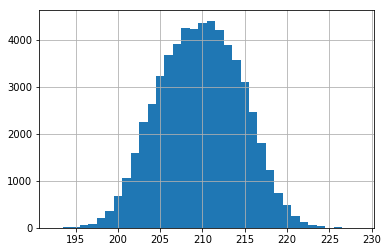

In [30]:
# ヒストグラムで分布を見る
import matplotlib.pyplot as plt
def set_as_hist(data):
    data['lidar'].hist(
        bins = max(data['lidar']) - min(data['lidar']),
        align='left')
set_as_hist(data)
plt.show()

$$
    \mu = \frac{1}{N} \sum_{i = 0}^{N - 1}z_{i}
$$

209.73713297619855 209.73713297619855


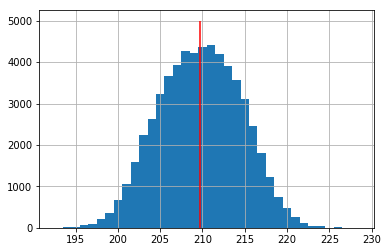

In [36]:
# 平均・表示
mean1 = sum(data['lidar'].values) / len(data['lidar'].values)
mean2 = data['lidar'].mean()
print(mean1, mean2)
set_as_hist(data)
plt.vlines(mean1, ymin=0, ymax=5000, color='red')
plt.show()

In [34]:
# 分散
zs = data['lidar'].values
z_length = len(zs)
mean = sum(zs) / z_length
diff_squared = [(z - mean)**2 for z in zs]

# 標本分散
sampling_var = sum(diff_squared) / z_length
# 不偏分散
unbiased_var = sum(diff_squared) / (z_length - 1)

print('mean is {0}'.format(mean))
print('sampling variance is {0}'.format(sampling_var))
print('unbiased variance is {0}'.format(unbiased_var))

mean is 209.73713297619855
sampling variance is 23.407709770274106
unbiased variance is 23.40810659855441


In [38]:
# 標準偏差
import math

stddev1 = math.sqrt(sampling_var)
stddev2 = math.sqrt(unbiased_var)

print('stddev1 = {}'.format(stddev1))
print('stddev2 = {}'.format(stddev2))

stddev1 = 4.838151482774605
stddev2 = 4.83819249292072


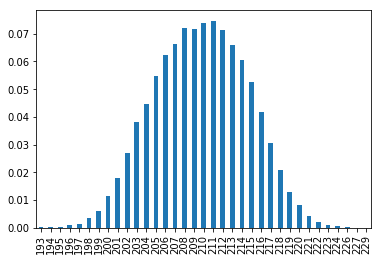

In [55]:
# 確率質量分布
# 離散的な変数に対する分布
# 連続的なら、確率密度分布
# 頻度のリスト表示
freqs = pd.DataFrame(data['lidar'].value_counts())
# 確率の列を追加
freqs['probs'] = freqs['lidar'] / z_length
freqs['probs'].sort_index().plot(kind='bar')
plt.show()

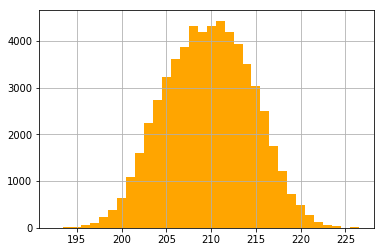

In [61]:
# 200mmくらいのあたりにおけるセンサ値のシミュレーション
def drawing(freqs):
    return freqs.sample(n=1, weights='probs').index[0]

samples = [drawing(freqs) for i in range(z_length)]
simulated_data = pd.DataFrame(samples, columns=['lidar'])
simulated_lidar = simulated_data['lidar']
simulated_lidar.hist(
    bins=max(simulated_lidar)-min(simulated_lidar),
    color='orange',
    align='left')
plt.show()

ガウス分布への当てはめ

$$
    P(a \le z < b) = \int_{a}^{b}p(z)dz
$$
$$
    p(z) = \frac{1}{\sqrt{2\pi\sigma^{2}}}\exp{\left(-\frac{(z - \mu)^{2}}{2\sigma^{2}}\right)}
$$

In [64]:
def draw_from_nd(z, mu, var):
    u"""正規分布に従った値（尤度）を得る
    
    Args:
        z(float): データ
        mu(float): 平均
        var(float): 分散
    """
    return math.exp(- (z - mu)**2 / (2. * var)) / math.sqrt(2. * math.pi * var)

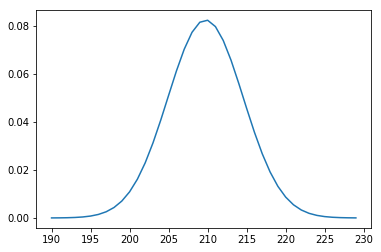

In [66]:
zs = range(190, 230)
ys = [draw_from_nd(z, mean, unbiased_var) for z in zs]
plt.plot(zs, ys)
plt.show()

In [70]:
def prob_of_nd_trapezoid_aproximated(base_z, width, mu, var):
    u"""正規分布に従った確率質量を得る
    台形近似した値を得る
    
    Args:
        base_z(float): 積分する基準の値
        width(float): 積分する幅
        mu(float): 平均
        var(float): 分散
    """
    return width * (draw_from_nd(base_z - width, mu, var) + draw_from_nd(base_z + width, mu, var))

[]

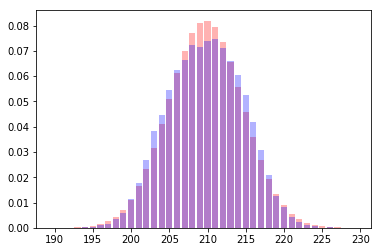

In [73]:
zs = range(190, 230)
ys = [prob_of_nd_trapezoid_aproximated(z, 0.5, mean, unbiased_var) for z in zs]

plt.bar(zs, ys, color='red', alpha=0.3)
f = freqs['probs'].sort_index()
plt.bar(f.index, f.values, color='blue', alpha=0.3)
plt.plot()